# Enron Fraud Dataset 安隆公司詐欺案資料集
data from [3rd_ML100Marathon Midterm](https://www.kaggle.com/c/3rd-ml100marathon-midterm/overview "Kaggle").  
+ **This is not offical data.**  
Just a exam from the lesson whitch I joined. And **I'm still doing this project.**  

----

# Loading Data

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

train = pd.read_csv('./3rd-ml100marathon-midterm/train_data.csv')
test = pd.read_csv('./3rd-ml100marathon-midterm/test_features.csv')

In [132]:
print(train.shape)
train.head()

(113, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 21 columns):
name                         33 non-null object
bonus                        21 non-null float64
deferral_payments            11 non-null float64
deferred_income              15 non-null float64
director_fees                4 non-null float64
email_address                28 non-null object
exercised_stock_options      21 non-null float64
expenses                     22 non-null float64
from_messages                21 non-null float64
from_poi_to_this_person      21 non-null float64
from_this_person_to_poi      21 non-null float64
loan_advances                2 non-null float64
long_term_incentive          17 non-null float64
other                        24 non-null float64
restricted_stock             28 non-null float64
restricted_stock_deferred    8 non-null float64
salary                       22 non-null float64
shared_receipt_with_poi      21 non-null float64
to_messages         

In [135]:
data = pd.concat([train, test], 0)
data.reset_index(inplace=True, drop=True)

In [136]:
#fix the columns sequence
data = data[['name', 'email_address',
             'deferral_payments', 'deferred_income', 'director_fees', 'loan_advances', 'long_term_incentive',
             'salary', 'bonus', 'expenses', 'other', 'total_payments',
             'restricted_stock', 'restricted_stock_deferred', 'exercised_stock_options', 'total_stock_value',
             'from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi','shared_receipt_with_poi', 'poi']]
data.head().T

,0,1,2,3,4
name,RICE KENNETH D,SKILLING JEFFREY K,SHELBY REX,KOPPER MICHAEL J,CALGER CHRISTOPHER F
email_address,ken.rice@enron.com,jeff.skilling@enron.com,rex.shelby@enron.com,michael.kopper@enron.com,christopher.calger@enron.com
deferral_payments,NaN,NaN,NaN,NaN,NaN
deferred_income,-3.50439e+06,NaN,-4167,NaN,-262500
director_fees,NaN,NaN,NaN,NaN,NaN
loan_advances,NaN,NaN,NaN,NaN,NaN
long_term_incentive,1.61701e+06,1.92e+06,NaN,602671,375304
salary,420636,1.11126e+06,211844,224305,240189
bonus,1.75e+06,5.6e+06,200000,800000,1.25e+06
expenses,46950,29336,22884,118134,35818


# Preprocessing and EDA

First look at our target.  
`poi`

Text(True, 15, '11.504%')

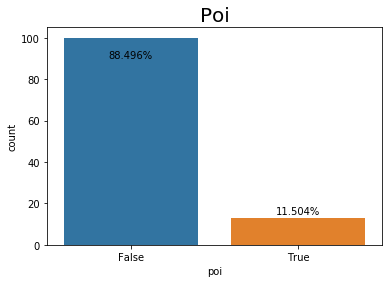

In [137]:
sns.countplot(data['poi'])
total = data['poi'].notnull().sum()
a = (data['poi'] ==False).sum()
b = (data['poi'] ==True).sum()
plt.title('Poi', fontsize=20)
plt.text(False, 90, '{:.3%}'.format(a/total), ha='center', fontsize=10)
plt.text(True, 15, '{:.3%}'.format(b/total), ha='center', fontsize=10)

----

### Data check
Payment : `total_payments` = `bonus`+`deferral_payments`+`(deferred_income)`+`director_fees`+`expenses` +`long_term_incentive`+`other`+`salary`+`loan_advances`  

Stock : `total_stock_value` = `restricted_stock`+`(restricted_stock_deferred)`+`exercised_stock_options`

Independence : `name`,`from_messages`,`from_poi_to_this_person`,`from_this_person_to_poi`,`shared_receipt_with_poi`,`to_messages`  
`email_address`,`poi`

###### `Payment`

In [138]:
#I believe the NaN here is because of there's no money activity, so fill with 0.
clearn_col = ['deferral_payments', 'deferred_income', 'director_fees', 'loan_advances', 'long_term_incentive',
             'salary', 'bonus', 'expenses', 'other', 'total_payments']
for col in clearn_col:
    data[col] = data[col].fillna(0)

In [139]:
data['money_clearn'] = data['total_payments']-(data['bonus']+data['deferral_payments']+data['deferred_income']+data['director_fees']\
+data['expenses']+data['long_term_incentive']+data['other']+data['salary']+data['loan_advances'])

data[data['money_clearn'] !=0].T

,50,139
name,BELFER ROBERT,BHATNAGAR SANJAY
email_address,NaN,sanjay.bhatnagar@enron.com
deferral_payments,-102500,0
deferred_income,0,0
director_fees,3285,137864
loan_advances,0,0
long_term_incentive,0,0
salary,0,0
bonus,0,0
expenses,0,0


I had checked raw data and found wrong input with the data[50].  
On the other hand, data[139] doesn't have raw data but it's eazy to fix the value to be correct data.

In [140]:
#Fix the data[50].
data['deferred_income'][50] = -102500
data['deferral_payments'][50] = 0
data['director_fees'][50] = 102500
data['total_payments'][50] = 3285
data['exercised_stock_options'][50] = 0
data['expenses'][50] = 3285
data['restricted_stock'][50] = 44093
data['restricted_stock_deferred'][50] = -44093
data['total_stock_value'][50] = 0

#Fix the data[139]
data['total_stock_value'][139] = data['total_payments'][139].copy()
data['total_payments'][139] = data['other'][139].copy()
data['director_fees'][139] = 0
data['restricted_stock_deferred'][139] = data['restricted_stock'][139].copy()
data['restricted_stock'][139] = data['exercised_stock_options'][139].copy()
data['exercised_stock_options'][139] = data['total_stock_value'][139].copy()

# #Check again.
data['money_clearn'] = data['total_payments']-(data['bonus']+data['deferral_payments']+data['deferred_income']+data['director_fees']\
+data['expenses']+data['long_term_incentive']+data['other']+data['salary']+data['loan_advances'])
data[data['money_clearn'] !=0]

,name,email_address,deferral_payments,deferred_income,director_fees,loan_advances,long_term_incentive,salary,bonus,expenses,...,restricted_stock_deferred,exercised_stock_options,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi,money_clearn


----

###### `Stock`

In [141]:
#The same reason to fill stock category.
clearn_col = ['restricted_stock', 'restricted_stock_deferred', 'exercised_stock_options', 'total_stock_value']
for col in clearn_col:
    data[col] = data[col].fillna(0)

In [142]:
data['stock_clean'] = data['total_stock_value'] - (data['restricted_stock']+data['restricted_stock_deferred']+data['exercised_stock_options'])
data[data['stock_clean'] !=0]

,name,email_address,deferral_payments,deferred_income,director_fees,loan_advances,long_term_incentive,salary,bonus,expenses,...,exercised_stock_options,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi,money_clearn,stock_clean


----

#### `email_address`

In [143]:
data['email_address'].str.split('@', expand=True).head()

,0,1
0,ken.rice,enron.com
1,jeff.skilling,enron.com
2,rex.shelby,enron.com
3,michael.kopper,enron.com
4,christopher.calger,enron.com


In [144]:
data['email_address'] = data['email_address'].str.split('@', expand=True)[0]
data['email_address'].str.split('.', expand=True).head()

,0,1,2
0,ken,rice,None
1,jeff,skilling,None
2,rex,shelby,None
3,michael,kopper,None
4,christopher,calger,None


In [145]:
data['email_address'].str.split('.', expand=True).nunique()

0     78
1    110
2      3
dtype: int64

In [146]:
data['email_address'] = data['email_address'].str.split('.', expand=True)[0]

In [147]:
data['email_address'] = data['email_address'].fillna('None')

In [148]:
pd.crosstab(data['email_address'], data['poi']).T.style.background_gradient(cmap='summer_r')

email_address,None,a,adam,andrew,ben,bill,bob,brian,charlene,chip,christopher,cindy,dan,danny,david,dick,diomedes,elizabeth,frank,gene,george,greg,james,janet,jay,jeff,jeffrey,jere,jeremy,joe,john,joseph,julia,keith,ken,kenneth,kevin,kulvinder,larry,lou,louise,mark,marty,matthew,michael,mike,mitchell,paula,phillip,rebecca,rex,richard,rick,rob,robert,rockford,rod,s,sally,scott,steven,terence,thomas,tracy,vicki,vince,w,wes
poi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,30,1,1,0,0,1,1,1,1,1,0,1,1,1,2,1,1,1,1,1,2,2,2,1,1,0,1,1,1,1,3,1,1,1,1,0,1,1,1,1,1,2,1,1,2,1,1,0,1,1,0,2,2,1,2,1,1,1,1,0,2,1,1,1,1,1,1,0
True,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Just get the key word whitch is useful to our model.  

----

In [149]:
#Check missing data
missing = pd.DataFrame({'missing':data.isnull().sum(),
                       'nunique':data.nunique()}).sort_values(by='missing', ascending=False)
missing

,missing,nunique
shared_receipt_with_poi,60,83
from_this_person_to_poi,60,41
from_poi_to_this_person,60,57
to_messages,60,86
from_messages,60,64
poi,33,2
name,0,146
email_address,0,79
money_clearn,0,1
total_stock_value,0,125


In [150]:
# g = sns.PairGrid(data[['exercised_stock_options', 'expenses','from_messages', 'from_poi_to_this_person',
#                     'from_this_person_to_poi','loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
#                     'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi','to_messages', 'total_payments',
#                     'total_stock_value']])
# g = g.map_diag(plt.hist, edgecolor='w')
# g = g.map_offdiag(plt.scatter, edgecolor='w')

In [151]:
fix_col = ['deferred_income', 'restricted_stock_deferred']
#features whitch is negative value.
for col in fix_col:
    data[col] = data[col].apply(lambda x: -np.log(-x) if x<0 else x)

In [152]:
log_col = ['bonus', 'deferral_payments',
       'director_fees', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other',
       'restricted_stock', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value',
       'money_clearn', 'stock_clean']
for col in log_col:
    data[col] = data[col].apply(lambda x: np.log(x) if x>0 else x)

In [153]:
#Label ['email_address']
data['email_address'] = data['email_address'].astype('category').cat.codes

----

###### `Others`(messages & poi)
I'm not sure the message from these features.  
~Since there's already 0 value inside, it's better to fill -999 or any other values.~  
~Ofcourse dont move our target `'poi'`.~

In [116]:
# clearn_col = ['from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi','shared_receipt_with_poi']
# for col in clearn_col:
#     data[col] = data[col].fillna(-1)

Try regression analysis.

In [117]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

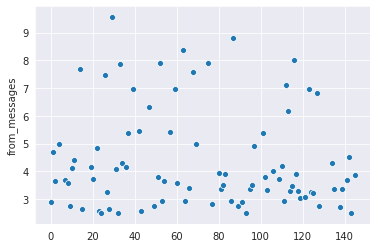

In [118]:
with sns.axes_style('darkgrid'):
    sns.scatterplot(data['from_messages'].index, data['from_messages'])

In [155]:
message_null = data[data['from_messages'].isnull()]
message_notnull = data[data['from_messages'].notnull()]
print(f'{len(message_null)}+{len(message_notnull)}')

60+86


In [28]:
# #RF
# rfModel = RandomForestRegressor(random_state=42)
# pred_col = ['email_address', 'deferral_payments', 'deferred_income',
#        'director_fees', 'loan_advances', 'long_term_incentive', 'salary',
#        'bonus', 'expenses', 'other', 'total_payments', 'restricted_stock',
#        'restricted_stock_deferred', 'exercised_stock_options',
#        'total_stock_value']
# rfModel.fit(message_notnull[pred_col], message_notnull['from_messages'])
# cross_val_score(rfModel, message_notnull[pred_col], message_notnull['from_messages'], scoring='neg_mean_squared_error', cv=5).mean()

-3.3445921161216425

In [29]:
# #GridSearch
# from sklearn.model_selection import GridSearchCV
# param_grid={'n_estimators':[100, 500, 1000],
#            'max_depth':[3, 6, 8],
#            'min_samples_split':[2, 5, 10],
#            'min_samples_leaf':[1, 2, 4]}
# gridsearch = GridSearchCV(rfModel, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
# grid_result = gridsearch.fit(message_notnull[pred_col], message_notnull['from_messages'])

# print('Best Negative_MSE : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.7s


Best Negative_MSE : -3.1186622435372993
Using {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   33.7s finished
C:\Users\camer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
# #Hyper
# rfModel = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=6, random_state=42)
# rfModel.fit(message_notnull[pred_col], message_notnull['from_messages'])
# cross_val_score(rfModel, message_notnull[pred_col], message_notnull['from_messages'], scoring='neg_mean_squared_error', cv=5).mean()

-3.1260924911478063

In [31]:
# message_pred = rfModel.predict(message_null[pred_col])
# message_null.loc[:,'from_messages'] = message_pred

In [160]:
#LGBM
lgbmModel = LGBMRegressor()
pred_col = ['email_address', 'deferral_payments', 'deferred_income',
       'director_fees', 'loan_advances', 'long_term_incentive', 'salary',
       'bonus', 'expenses', 'other', 'total_payments', 'restricted_stock',
       'restricted_stock_deferred', 'exercised_stock_options',
       'total_stock_value']
lgbmModel.fit(message_notnull[pred_col], message_notnull['from_messages'])
cross_val_score(lgbmModel, message_notnull[pred_col], message_notnull['from_messages'], scoring='neg_mean_squared_error', cv=5).mean()

-3.895405814272884

In [158]:
#GridSearch
param_grid = {'max_depth':[3, 4, 5],
              'num_leaves':[5, 15, 30],
             'learning_rate':[0.03, 0.05, 0.1],
             'n_estimators':[100, 200, 500, 1000],
             'subsample':[0.3, 0.5, 0.8, 1.0],
             'colsample_bytree':[0.3, 0.5, 0.8, 1.0]}
grid_search = GridSearchCV(lgbmModel, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(message_notnull[pred_col], message_notnull['from_messages'])
print('Best Accuracy :{}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_) )

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1307 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 3807 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 7307 tasks      | elapsed:   57.0s


Best Accuracy :-0.16294584067158643
Using {'colsample_bytree': 0.3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 5, 'subsample': 0.3}


[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:  1.1min finished


In [161]:
#LGBM
lgbmModel = LGBMRegressor(colsample_bytree=0.3, learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=5, subsample=0.3)
lgbmModel.fit(message_notnull[pred_col], message_notnull['from_messages'])
cross_val_score(lgbmModel, message_notnull[pred_col], message_notnull['from_messages'], scoring='neg_mean_squared_error', cv=5).mean()

-3.18053901057063

In [162]:
message_pred = lgbmModel.predict(message_null[pred_col])
message_null.loc[:,'from_messages'] = message_pred

In [163]:
#The same way to other features.

#['to_messages']
lgbmModel.fit(message_notnull[pred_col], message_notnull['to_messages'])
message_pred = lgbmModel.predict(message_null[pred_col])
message_null.loc[:,'to_messages'] = message_pred

#['from_poi_to_this_person']
lgbmModel.fit(message_notnull[pred_col], message_notnull['from_poi_to_this_person'])
message_pred = lgbmModel.predict(message_null[pred_col])
message_null.loc[:,'from_poi_to_this_person'] = message_pred

#['from_this_person_to_poi']
lgbmModel.fit(message_notnull[pred_col], message_notnull['from_this_person_to_poi'])
message_pred = lgbmModel.predict(message_null[pred_col])
message_null.loc[:,'from_this_person_to_poi'] = message_pred

#['shared_receipt_with_poi']
lgbmModel.fit(message_notnull[pred_col], message_notnull['shared_receipt_with_poi'])
message_pred = lgbmModel.predict(message_null[pred_col])
message_null.loc[:,'shared_receipt_with_poi'] = message_pred

In [164]:
#return data
data = message_notnull.append(message_null)
data.reset_index(inplace=True, drop=True)

----

In [165]:
#Set train and test datasets
train = data[data['poi'].notnull()]

test = data[data['poi'].isnull()]
test.reset_index(inplace=True, drop=True)

In [166]:
#Label ['poi']
train['poi'] = train['poi'].apply(lambda x: 0 if x==False else 1)

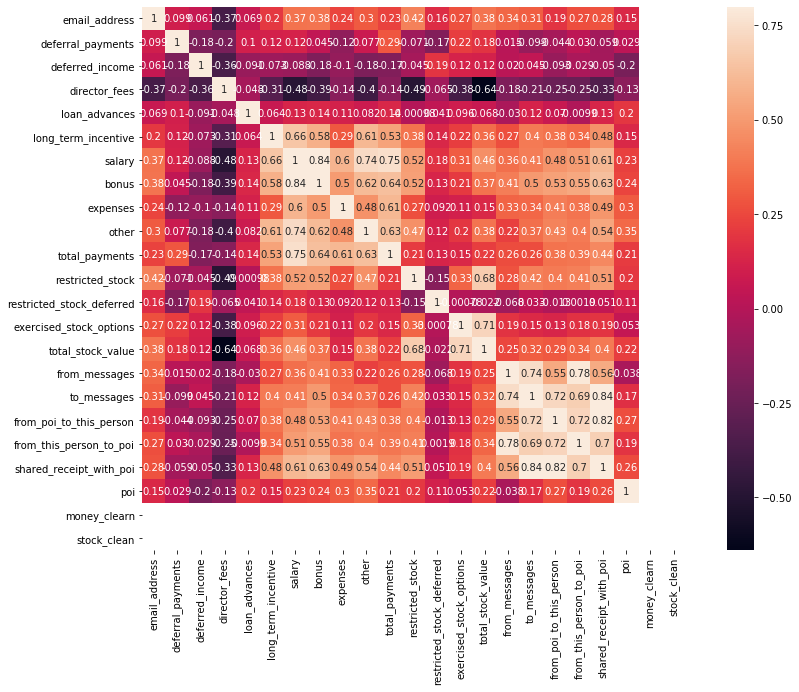

In [167]:
plt.figure(figsize=(15,10))
h = train.corr()
sns.heatmap(h, vmax=0.8, annot=True, square=True)

## Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

### LogisticRegression

In [176]:
#basic
lr = LogisticRegression()
lr.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lr, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8581027667984191

In [177]:
#GridSearch
param_grid = {'C':np.logspace(-3,3,7),
             'penalty':['l1','l2']}
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(train.iloc[:, 1:21], train['poi'])

print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s


Best Accuracy : 0.8849557522123894
Using {'C': 0.001, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.6s finished


In [178]:
#hyper
lr = LogisticRegression(C=0.001, penalty='l1')
lr.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lr, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8853754940711462

### RandomForestClassifier

In [41]:
#basic
rf = RandomForestClassifier(random_state=42)
rf.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(rf, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8936758893280633

In [42]:
#GridSearch
param_grid={'n_estimators':[100, 500, 1000],
           'max_depth':[3, 6, 8],
           'min_samples_split':[2, 5, 10],
           'min_samples_leaf':[1, 2, 4]}
gridsearch = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = gridsearch.fit(train.iloc[:, 1:21], train['poi'])

print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   16.1s


Best Accuracy : 0.9026548672566371
Using {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   31.6s finished
C:\Users\camer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
#hyper
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=1, 
                            max_depth=3, random_state=42)
rf.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(rf, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.9023715415019762

>**Feature Importances**

In [ ]:
pd.DataFrame(rf.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)\
.tail()

### GradientBoostingClassifier

In [44]:
#basic
gb = GradientBoostingClassifier(random_state=42)
gb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(gb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8241106719367588

GridSearch cost too much times, try RandomSearch.

In [ ]:
# # GridSearch
# param_grid = {'learning_rate':[0.1, 0.3, 0.5],
#              'n_estimators':[100, 200, 300],
#              'subsample':[1.0, 0.5, 0.3, 0.1],
#              'min_samples_split':[2, 5, 10],
#              'min_samples_leaf':[1, 2, 4],
#              'max_depth':[3, 6, 8],
#              'tol':[0.01, 0.05, 0.1]}
# gridsearch = GridSearchCV(gb, param_grid, n_jobs=-1, verbose=1)
# grid_result = gridsearch.fit(train.iloc[:, 1:21], train['poi'])

# print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_))

In [45]:
#RandomSearch
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'learning_rate':[0.1, 0.3, 0.5],
             'n_estimators':[100, 200, 300],
             'subsample':[1.0, 0.5, 0.3, 0.1],
             'min_samples_split':[2, 5, 10],
             'min_samples_leaf':[1, 2, 4],
             'max_depth':[3, 6, 8],
             'tol':[0.01, 0.05, 0.1]}
random_search = RandomizedSearchCV(gb, param_grid, n_iter=20, cv=5, iid=False)
random_result = random_search.fit(train.iloc[:, 1:21], train['poi'])

print('Best Accuracy : {}\nUsing {}'.format(random_result.best_score_, random_result.best_estimator_))

Best Accuracy : 0.8936758893280633
Using GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.01,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [46]:
#hyper
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.01,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(gb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8936758893280633

>**Feature Importances**

In [ ]:
pd.DataFrame(gb.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)\
.tail()

### XGB

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(xgb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.875889328063241

In [48]:
#GridSearch
param_grid = {'n_estimators':[100, 200, 300],
              'min_child_weight':[1, 5, 10],
             'gamma':[0.5, 1, 1.5, 2, 5],
             'subsample':[0.6, 0.8, 1.0],
             'max_depth':[3, 4, 5]}
gridsearch = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = gridsearch.fit(train.iloc[:,1:21], train['poi'])
print('Best Accuracy : {}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_) )

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   13.0s


Best Accuracy : 0.8938053097345132
Using {'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:   15.5s finished
C:\Users\camer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [49]:
#hyper
xgb = XGBClassifier(gamma=1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8)
xgb.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(xgb, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8936758893280633

>**Feature Importances**

In [ ]:
pd.DataFrame(xgb.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)\
.head(10)

### LightGBM

In [168]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective='binary')
lgbm.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lgbm, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8770750988142293

In [169]:
#GridSearch
param_grid = {'max_depth':[3, 4, 5],
              'num_leaves':[5, 15, 30],
             'learning_rate':[0.03, 0.05, 0.1],
             'n_estimators':[100, 200, 500, 1000],
             'subsample':[0.3, 0.5, 0.8, 1.0],
             'colsample_bytree':[0.3, 0.5, 0.8, 1.0]}
grid_search = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_result = grid_search.fit(train.iloc[:, 1:21], train['poi'])
print('Best Accuracy :{}\nUsing {}'.format(grid_result.best_score_, grid_result.best_params_) )

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 4196 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:  1.1min


Best Accuracy :0.8849557522123894
Using {'colsample_bytree': 0.3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 5, 'subsample': 0.3}


[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:  1.3min finished


In [ ]:
#hyper
lgbm = LGBMClassifier(objective='binary', learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.5)
lgbm.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lgbm, train.iloc[:, 1:21], train['poi'], cv=5).mean()

In [170]:
#hyper2
lgbm = LGBMClassifier(objective='binary', learning_rate=0.03, max_depth=3, num_leaves=5, n_estimators=100, subsample=0.3, colsample_bytree=0.3)
lgbm.fit(train.iloc[:, 1:21], train['poi'])
cross_val_score(lgbm, train.iloc[:, 1:21], train['poi'], cv=5).mean()

0.8849802371541502

In [171]:
pd.DataFrame(lgbm.feature_importances_, index=list(train.columns[1:21]), columns=['Importances']).sort_values(by='Importances',ascending=False)

,Importances
other,40
from_this_person_to_poi,36
restricted_stock,26
shared_receipt_with_poi,25
from_poi_to_this_person,24
expenses,23
from_messages,22
total_stock_value,21
exercised_stock_options,21
to_messages,19


----
## For submit

In [172]:
#hyper2
y_predLGBM = lgbm.predict_proba(test.iloc[:, 1:21])[:, 1]
y_predLGBM

array([0.3144446 , 0.21076811, 0.53928842, 0.13123005, 0.5371952 ,
       0.15350984, 0.53393922, 0.12047342, 0.05727713, 0.01119118,
       0.03958033, 0.47068437, 0.01208471, 0.41192667, 0.03968819,
       0.04099959, 0.06335358, 0.24531516, 0.1555769 , 0.01305135,
       0.23130732, 0.01208579, 0.07309114, 0.00961503, 0.08357629,
       0.18726447, 0.04615399, 0.00758233, 0.37733292, 0.02373364,
       0.07776151, 0.01720861, 0.28255908])

In [ ]:
y_pred = lgbm.predict_proba(test.iloc[:, 1:21])[:, 1]
y_pred

In [86]:
y_predXGB = xgb.predict_proba(test.iloc[:, 1:21])[:, 1]
y_predXGB

array([0.24739794, 0.39846393, 0.7804927 , 0.05959484, 0.6354734 ,
       0.20070498, 0.79763156, 0.1345942 , 0.04016751, 0.00621949,
       0.01861724, 0.5128177 , 0.00665092, 0.6795713 , 0.04979885,
       0.01577602, 0.46532384, 0.21725081, 0.1112821 , 0.00755477,
       0.5878565 , 0.00754496, 0.04200055, 0.00665092, 0.05421118,
       0.11295754, 0.06090789, 0.00665031, 0.82276756, 0.02177704,
       0.02251694, 0.01523102, 0.14203408], dtype=float32)

In [87]:
y_predGB = gb.predict_proba(test.iloc[:, 1:21])[:,1]
y_predGB

array([5.85303659e-03, 2.65238978e-01, 9.70653324e-01, 3.89135490e-05,
       6.93962323e-01, 4.33342788e-02, 1.12534839e-01, 1.95210467e-02,
       5.51979823e-04, 9.95833534e-05, 3.41764201e-05, 6.12528647e-01,
       1.48452882e-05, 2.60314388e-01, 1.26447540e-04, 9.16773408e-05,
       9.55634870e-01, 2.15876811e-03, 8.48114818e-04, 2.50865599e-05,
       2.71485238e-01, 2.91513093e-05, 1.66845624e-04, 1.62785535e-05,
       2.94383561e-04, 5.76030332e-03, 2.72349344e-02, 1.63228582e-05,
       9.96802467e-01, 1.44684636e-04, 3.12709650e-05, 2.28969607e-05,
       1.44493373e-04])

In [88]:
y_predRF = rf.predict_proba(test.iloc[:, 1:21])[:,1]
y_predRF

array([0.26913194, 0.24422623, 0.28910954, 0.20918693, 0.37380696,
       0.2320333 , 0.57793447, 0.12197405, 0.09643663, 0.02347494,
       0.03648096, 0.36103647, 0.01037221, 0.32026251, 0.08602848,
       0.02503054, 0.38744812, 0.13271338, 0.39862849, 0.01715186,
       0.3232606 , 0.00694363, 0.05661488, 0.00694363, 0.06512999,
       0.1372688 , 0.12241826, 0.02112102, 0.79154283, 0.03526665,
       0.02250874, 0.02176122, 0.06518726])

In [179]:
y_predLR = lr.predict_proba(test.iloc[:, 1:21])[:,1]
y_predLR

array([0.45938724, 0.46908272, 0.47765722, 0.49140174, 0.46736984,
       0.48853654, 0.47422555, 0.48452655, 0.46166604, 0.46736984,
       0.48395385, 0.4862449 , 0.482236  , 0.482236  , 0.47422555,
       0.46851168, 0.46280605, 0.47022504, 0.48109099, 0.49254799,
       0.48395385, 0.5       , 0.5       , 0.5       , 0.4588178 ,
       0.48166347, 0.48910952, 0.4862449 , 0.5       , 0.48109099,
       0.47708512, 0.5       , 0.45824847])

## Blending

In [90]:
y_pred = y_predLGBM *0.67 + y_predRF * 0.03 + y_predLR * 0.30

In [173]:
submit = pd.DataFrame({'name':test['name'],
                     'poi':y_pred})
submit

,name,poi
0,BELDEN TIMOTHY N,0.314445
1,BOWEN JR RAYMOND M,0.210768
2,HANNON KEVIN P,0.539288
3,DELAINEY DAVID W,0.131230
4,CAUSEY RICHARD A,0.537195
5,HICKERSON GARY J,0.153510
6,FREVERT MARK A,0.533939
7,DONAHUE JR JEFFREY M,0.120473
8,HORTON STANLEY C,0.057277
9,LEWIS RICHARD,0.011191


In [174]:
submit.to_csv('Kaggle_test_HW.csv', index=False)

In [175]:
take = pd.read_csv('./3rd-ml100marathon-midterm/test_features.csv')['name']
ending = pd.merge(take, submit, on='name')
ending.to_csv('Kaggle_test_HWmessage_pred_LGBM.csv', index=False)